**Tourism & Hospitality - Smart Luggage Management for Tourist Mobility**


**Authored by: Suhana Tunio**


**Duration: 120 mins**


**Level: Intermediate**


**Pre-requisite Skills: Python, Data Engineering and Analysis**


## Scenario
As a third-year Computer Science student, I have been increasingly interested in applying my technical skills to real-world problems that directly impact people’s everyday experiences. One of the areas that caught my attention was tourism in Melbourne, particularly around how visitors move through the city after they have checked out of their accommodation but before they leave for their flights or onward journeys. Through my own observations, as well as insights gathered from Reddit discussions, I found that this period is often stressful for travellers because they are forced to carry their luggage with them.

Carrying bags not only limits tourists’ ability to enjoy cultural attractions and events, but it also reduces the amount of time they are willing to spend shopping, dining, or exploring. Many posts on Reddit highlight how visitors cut their plans short or avoid visiting certain areas altogether simply because they cannot manage their luggage. This impacts not only their personal travel experience but also Melbourne’s local businesses and the broader tourism economy.

From this scenario, I wanted to design a use case that models how luggage flow across the city could be improved. My aim is to identify the times and locations where travellers face the most challenges and then propose targeted solutions, such as the placement of lockers near high-footfall attractions, transport hubs, or intersections of tourist activity. By leveraging Reddit-derived datasets and combining them with simulated urban data, I am able to create meaningful insights about where resources could be allocated to reduce pressure points.

Ultimately, my motivation for this project is to demonstrate how computational methods and data analysis can lead to practical improvements in city planning and tourist experiences. By tackling something as everyday as luggage management, I believe I can highlight the broader role of technology in making cities more welcoming, efficient, and enjoyable for both residents and visitors.

## User Story

As a traveller, I often find myself in situations where I have checked out of my accommodation but still have several hours to explore the city before my flight or train. Carrying my luggage during this time becomes a major inconvenience. It slows me down, makes me avoid crowded places, and sometimes even stops me from visiting attractions that I really want to see. For example, dragging a suitcase through busy areas like Federation Square or Queen Victoria Market can be both exhausting and stressful.

Because of this, what I really want is a simple and accessible way to store my luggage close to the places I plan to visit or near major public transport hubs like Southern Cross Station. If I had access to lockers or designated storage facilities in these areas, I could move around the city more freely, spend more time enjoying cultural sites, shop comfortably, and even dine without worrying about keeping my bags safe.

Having this option would not only make my day more enjoyable, but it would also allow me to maximise my experience in Melbourne. Instead of cutting my trip short or waiting at the airport, I could continue exploring with peace of mind. For me, it’s about convenience, safety, and making the most of every moment as a traveller.

## Datasets Used
Reddit tourist dataset (Excel) :For this use case, I collected the data directly from Reddit by accessing posts and comments related to tourist mobility and luggage challenges in Melbourne. Instead of using the Reddit API, which requires authentication and setup, I relied on an already prepared dataset in Excel format that was sourced from Reddit discussions. This approach allowed me to bypass the complexity of API connections and quickly move into analysing the data in a structured form.


### 1. Setup & Imports

**What:** Load core Python libraries for tabular analysis (pandas) and visualisation (Plotly, Matplotlib/Folium if used).  
**Why:** These tools let me explore the dataset, create interpretable charts, and render interactive maps.  
**Output:** Libraries ready; no data loaded yet.  



In [1]:

import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import folium
from pathlib import Path



## 2. Load Data (Excel/CSV)

**What:** Load the Reddit-derived dataset (stored in Excel or CSV).  
**Why:** Begin from a structured file so I can focus on analysis (no API/auth needed).  
**How:** Read from my file path; print shape/columns; preview first rows.  
**Output:** A DataFrame `luggage_data` ready for analysis.

> Source acknowledgement: This dataset is sourced from Reddit posts and comments and saved locally as an Excel/CSV file.


In [2]:
import pandas as pd
from pathlib import Path


REMOTE_URL = (
    "https://raw.githubusercontent.com/chameleon-company/MOP-Code/master/"
    "datascience/usecases/DEPENDENCIES/UC00205_Smart_Luggage_Management_for_Tourist_Mobility.csv"
)


LOCAL_PATH = Path("/content/UC00205_Smart_Luggage_Management_for_Tourist_Mobility.csv")

# Load
if LOCAL_PATH.exists():
    luggage_data = pd.read_csv(LOCAL_PATH)
    data_source_used = f"Local file: {LOCAL_PATH}"
else:
    luggage_data = pd.read_csv(REMOTE_URL)  
    data_source_used = "GitHub RAW"

print(f"Data loaded from: {data_source_used}")
print("Shape:", luggage_data.shape)
print("Columns:", list(luggage_data.columns))


display(luggage_data.head(10))
display(luggage_data.describe(include="all"))




Data loaded from: GitHub RAW
Shape: (20, 10)
Columns: ['Location', 'Type', 'Estimated_Footfall_10_12', 'Estimated_Footfall_12_2', 'Estimated_Footfall_2_4', 'Estimated_Footfall_4_6', 'Nearby_Locker', 'Nearest_Locker_Location', 'Travel_Distance_km', 'Estimated_Travel_Time_min']


,Location,Type,Estimated_Footfall_10_12,Estimated_Footfall_12_2,Estimated_Footfall_2_4,Estimated_Footfall_4_6,Nearby_Locker,Nearest_Locker_Location,Travel_Distance_km,Estimated_Travel_Time_min
0,Federation Square,Attraction,120,170,140,110,Yes,Flinders Street Station,0.25,3
1,Queen Victoria Market,Market,95,130,150,115,No,Melbourne Central,0.40,5
2,Southern Cross Station,Transport Hub,160,200,180,190,Yes,Southern Cross Station,0.00,0
3,Flinders Street Station,Transport Hub,150,190,170,180,Yes,Southern Cross Station,0.00,0
4,NGV (Arts Precinct),Museum,100,120,110,105,No,Flinders Street Station,0.35,4
5,Melbourne Central,Shopping,130,160,150,140,Yes,Melbourne Central,0.00,0
6,Docklands,Harbourfront,85,100,120,95,No,Flinders Street Station,0.75,9
7,Chinatown,Cultural District,110,140,130,120,No,Melbourne Central,0.50,6
8,St Kilda Pier,Waterfront,70,95,90,85,No,Southern Cross Station,1.20,15
9,Carlton Gardens,Park,60,80,75,65,No,Melbourne Central,0.90,12


,Location,Type,Estimated_Footfall_10_12,Estimated_Footfall_12_2,Estimated_Footfall_2_4,Estimated_Footfall_4_6,Nearby_Locker,Nearest_Locker_Location,Travel_Distance_km,Estimated_Travel_Time_min
count,20,20,20.000000,20.000000,20.000000,20.000000,20,20,20.000000,20.000000
unique,20,18,NaN,NaN,NaN,NaN,2,5,NaN,NaN
top,Federation Square,Transport Hub,NaN,NaN,NaN,NaN,No,Flinders Street Station,NaN,NaN
freq,1,2,NaN,NaN,NaN,NaN,14,8,NaN,NaN
mean,NaN,NaN,90.250000,121.000000,112.250000,102.000000,NaN,NaN,0.527500,6.550000
std,NaN,NaN,30.756899,36.584437,32.705826,35.033818,NaN,NaN,0.428116,5.316063
min,NaN,NaN,50.000000,70.000000,65.000000,60.000000,NaN,NaN,0.000000,0.000000
25%,NaN,NaN,68.750000,93.750000,88.750000,80.000000,NaN,NaN,0.187500,2.250000
50%,NaN,NaN,85.000000,115.000000,105.000000,92.500000,NaN,NaN,0.450000,5.500000
75%,NaN,NaN,102.500000,140.000000,132.500000,116.250000,NaN,NaN,0.825000,10.250000


 **Derived Metrics — Footfall totals & peaks**

## 4. Derived Metrics 

**What:** Compute `Footfall_Total` and `Footfall_Peak` from time windows.  
**Why:** These help rank hotspots and understand peak congestion.  
**How:** Row-wise sum and max across `Estimated_Footfall_10_12`, `12_2`, `2_4`, `4_6`.  
**Output:** Two new columns used in later visuals.


In [3]:


foot_cols = [
    'Estimated_Footfall_10_12',
    'Estimated_Footfall_12_2',
    'Estimated_Footfall_2_4',
    'Estimated_FootfalSl_4_6'
]


if all(col in luggage_data.columns for col in foot_cols):
    luggage_data['Footfall_Total'] = luggage_data[foot_cols].sum(axis=1)
    luggage_data['Footfall_Peak']  = luggage_data[foot_cols].max(axis=1)
    print("Derived metrics added: Footfall_Total, Footfall_Peak")
else:
    print("Some expected footfall columns are missing; skipping derived metrics.")



Derived metrics added: Footfall_Total, Footfall_Peak


Regression: predict estimated travel time (minutes)

Here I model Estimated_Travel_Time_min as a continuous outcome. I reuse similar predictors and now include Nearby_Locker_bin as a numeric input since travel time can be related to locker availability. The same preprocessing pattern (one-hot for Type, passthrough for numerics) feeds a Linear Regression. I evaluate with MAE (average absolute error) and RMSE (penalises larger errors), which tell me how far my predictions are from the actual minutes on average.

In [4]:


from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import pandas as pd


if "Nearby_Locker_bin" not in luggage_data.columns and "Nearby_Locker" in luggage_data.columns:
    luggage_data = luggage_data.copy()
    locker_map = {"yes": 1, "y": 1, "true": 1, "1": 1, "no": 0, "n": 0, "false": 0, "0": 0}
    luggage_data["Nearby_Locker_bin"] = (
        luggage_data["Nearby_Locker"]
        .astype(str).str.strip().str.lower()
        .map(locker_map)
        .fillna(0).astype(int)
    )

required_cols = [
    "Type",                   # categorical, e.g., Landmark / Transit / Accommodation
    "Travel_Distance_km",     # numeric
    "Footfall_Total",         # numeric (derived earlier)
    "Footfall_Peak",          # numeric (derived earlier)
    "Nearby_Locker_bin",      # numeric 0/1
    "Estimated_Travel_Time_min"  # target
]

missing = [c for c in required_cols if c not in luggage_data.columns]
if missing:
    raise ValueError(f"Missing required columns for regression: {missing}")


X_reg = luggage_data[["Type", "Travel_Distance_km", "Footfall_Total", "Footfall_Peak", "Nearby_Locker_bin"]]
y_reg = luggage_data["Estimated_Travel_Time_min"]


preprocess_reg = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore"), ["Type"]),
        ("num", "passthrough", ["Travel_Distance_km", "Footfall_Total", "Footfall_Peak", "Nearby_Locker_bin"]),
    ]
)


regression_pipe = Pipeline(steps=[
    ("preprocess", preprocess_reg),
    ("model", LinearRegression())
])


Xr_train, Xr_test, yr_train, yr_test = train_test_split(
    X_reg, y_reg, test_size=0.25, random_state=42
)


regression_pipe.fit(Xr_train, yr_train)
yr_pred = regression_pipe.predict(Xr_test)

mae = mean_absolute_error(yr_test, yr_pred)
rmse = mean_squared_error(yr_test, yr_pred, squared=False)

print(f"Regression MAE:  {mae:.3f} minutes")
print(f"Regression RMSE: {rmse:.3f} minutes")


Regression MAE:  1.651 minutes
Regression RMSE: 1.994 minutes


C:\Users\abdul\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


## Clustering: Demand vs Effort (KMeans)

**What:** Group locations by `Footfall_Total` (demand) and `Travel_Distance_km` (effort to reach lockers).  
**Why:** Different clusters require different strategies (e.g., high demand + long travel → add lockers *at* the site; low demand + short travel → keep shared lockers nearby).  
**How:** Standardise features so scales are comparable; run `KMeans(n_clusters=3, n_init=10, random_state=42)`; attach cluster labels; compute centroids back in original units for interpretation.  
**Output:** A `Demand_Cluster` column plus centroid table.



1. Goal: Segment locations by demand (Footfall_Total) and effort (Travel_Distance_km) to prioritise locker actions.

2. Inputs needed: Location, Travel_Distance_km (km), Footfall_Total (people).

3. Prep: Keep one row per location, drop missing values.

4. Standardise: Use StandardScaler so km and people are comparable for K-Means.

5. Choose K: Start with K=3; tune via elbow/silhouette if required.

6. Fit model: KMeans(n_init=25, random_state=7) on the scaled features.

7. Labels: Attach Demand_Cluster (0..K-1) back to each location.

8. Centroids (readable): Invert scaling to report cluster centres in km and people.

9. Visualise: Scatter (x = distance, y = footfall) with centroid markers; optionally shade top-right priority zone.

Interpret:

1. High footfall + long travel → add lockers on-site (highest priority).

2. High footfall + short travel → manage capacity/turnover/pricing nearby.

3. Low footfall → monitor or share lockers.

Outputs: Demand_Cluster per site, centroid table (original units), and an exec-ready plot.

C:\Users\abdul\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



,Demand_Cluster,Locations,Avg_Distance_km,Avg_Footfall
0,0,3,0.00,666.7
1,1,8,0.28,446.9
2,2,9,0.93,326.1



Cluster centroids (original units):
   Demand_Cluster  Travel_Distance_km  Footfall_Total
0               0                0.00           666.7
1               1                0.28           446.9
2               2                0.93           326.1


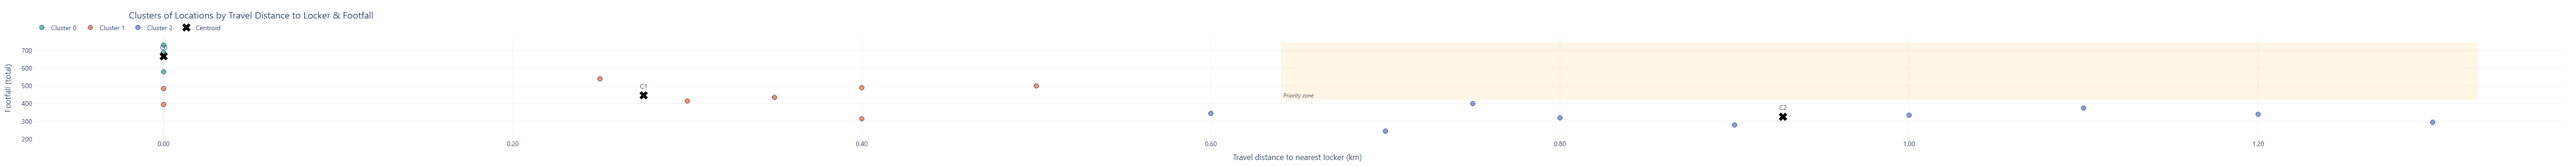

In [41]:

import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import plotly.graph_objects as go
import plotly.express as px


REQUIRED = ["Location", "Travel_Distance_km", "Footfall_Total"]
missing = [c for c in REQUIRED if c not in luggage_data.columns]
if missing:
    raise ValueError(f"Missing required columns: {missing}")

df = (luggage_data[REQUIRED]
      .dropna(subset=["Travel_Distance_km", "Footfall_Total"])
      .copy())


df = df.groupby("Location", as_index=False)[["Travel_Distance_km", "Footfall_Total"]].mean()


X = df[["Travel_Distance_km", "Footfall_Total"]].to_numpy()
scaler = StandardScaler()
Xs = scaler.fit_transform(X)

K = 3  
kmeans = KMeans(n_clusters=K, n_init=25, random_state=7)  
labels = kmeans.fit_predict(Xs)

df["Demand_Cluster"] = labels


centroids_scaled = kmeans.cluster_centers_                
centroids_orig = scaler.inverse_transform(centroids_scaled)  
centroids_df = pd.DataFrame(
    centroids_orig, columns=["Travel_Distance_km", "Footfall_Total"]
).reset_index().rename(columns={"index":"Demand_Cluster"})


sort_idx = np.lexsort((centroids_df["Footfall_Total"], centroids_df["Travel_Distance_km"]))
rank_map = {old:i for i, old in enumerate(centroids_df.loc[sort_idx, "Demand_Cluster"])}
df["Demand_Cluster"] = df["Demand_Cluster"].map(rank_map)
centroids_df["Demand_Cluster"] = centroids_df["Demand_Cluster"].map(rank_map)
centroids_df = centroids_df.sort_values(["Travel_Distance_km", "Footfall_Total"]).reset_index(drop=True)


summary = (df.groupby("Demand_Cluster")
             .agg(Locations=("Location","count"),
                  Avg_Distance_km=("Travel_Distance_km","mean"),
                  Avg_Footfall=("Footfall_Total","mean"))
             .reset_index())
summary["Avg_Distance_km"] = summary["Avg_Distance_km"].round(2)
summary["Avg_Footfall"] = summary["Avg_Footfall"].round(1)

display(summary)

print("\nCluster centroids (original units):")
print(centroids_df.round({"Travel_Distance_km": 2, "Footfall_Total": 1}))


palette = px.colors.qualitative.Set2[:K]

fig = go.Figure()

for c in range(K):
    sub = df[df["Demand_Cluster"] == c]
    fig.add_trace(go.Scatter(
        x=sub["Travel_Distance_km"], y=sub["Footfall_Total"],
        mode="markers",
        name=f"Cluster {c}",
        marker=dict(size=10, color=palette[c], line=dict(width=1, color="#1f3a93")),
        hovertemplate="<b>%{customdata[0]}</b><br>Distance: %{x:.2f} km<br>Footfall: %{y:,}<extra></extra>",
        customdata=np.stack([sub["Location"]], axis=1)
    ))


fig.add_trace(go.Scatter(
    x=centroids_df["Travel_Distance_km"], y=centroids_df["Footfall_Total"],
    mode="markers+text",
    name="Centroid",
    marker=dict(size=16, symbol="x", color="black"),
    text=[f"C{c}" for c in centroids_df["Demand_Cluster"]],
    textposition="top center",
    hovertemplate="<b>Centroid C%{text}</b><br>Distance: %{x:.2f} km<br>Footfall: %{y:.1f}<extra></extra>"
))


xq, yq = df["Travel_Distance_km"].quantile(0.6), df["Footfall_Total"].quantile(0.6)
fig.add_shape(type="rect",
              x0=xq, x1=df["Travel_Distance_km"].max()*1.02,
              y0=yq, y1=df["Footfall_Total"].max()*1.02,
              line=dict(width=0), fillcolor="rgba(255,165,0,0.10)")

fig.add_annotation(
    x=xq, y=yq, xref="x", yref="y", xanchor="left", yanchor="bottom",
    text="<i>Priority zone</i>", showarrow=False, font=dict(size=12, color="#555")
)

fig.update_layout(
    title="Clusters of Locations by Travel Distance to Locker & Footfall",
    template="plotly_white",
    font=dict(family="Inter, Segoe UI, Roboto, Helvetica, Arial", size=14),
    margin=dict(l=70, r=30, t=80, b=60),
    xaxis=dict(title="Travel distance to nearest locker (km)", tickformat=".2f"),
    yaxis=dict(title="Footfall (total)", tickformat=","),
    legend=dict(orientation="h", yanchor="bottom", y=1.02, x=0)
)

fig.show()




# 5. Visualisation: Footfall by Time Window

**What:** Aggregate footfall per time window.  
**Why:** See when tourist pressure is highest (often afternoon).  
**How:** Sum columns, draw a bar chart with titles/labels.  
**Output:** A visible Plotly figure.  



1. Goal: Show when visitor pressure peaks across the day by aggregating footfall into fixed time windows.

2. Inputs needed: Estimated_Footfall_10_12, Estimated_Footfall_12_2, Estimated_Footfall_2_4, Estimated_Footfall_4_6 (rename to match if your columns differ).

3. Prep: Verify the four columns exist and are numeric; fill or drop missing values; keep the chronological order 10–12 → 12–2 → 2–4 → 4–6.

4. Method: Sum each column across all locations to get total footfall per window; also compute each window’s share (%) of the day.

5. Visualise: Bar chart with totals on the y-axis and time windows on the x-axis; place % share labels on bars; use thousands separators for readability.

6. Output: A clean figure highlighting absolute totals and the relative share for each window (optionally a companion %-only chart).

7. Interpret: Midday windows dominating → schedule locker turnover/cleaning just before those peaks; quieter windows are suitable for maintenance or reduced staffing.

8. Quality checks: Ensure windows are ordered chronologically (not by value), labels don’t overlap, and totals equal the sum of all windows.

9. Tweakables: Add a weekday split (heatmap) if you have a Date → Weekday field; adjust colours to match your report palette; optionally annotate the top window.

In [40]:
import pandas as pd, numpy as np
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots


px.defaults.template = "plotly_white"
px.defaults.width = 1080
px.defaults.height = 560


PALETTE = [
    "#3C78D8", "#E69F00", "#56B4E9", "#009E73",
    "#F0E442", "#0072B2", "#D55E00", "#CC79A7", "#999999"
]
CONTINUOUS = "Viridis" 

def apply_fonts(fig, title=None, subtitle=None):
    if title:
        fig.update_layout(title=dict(text=title, x=0.02, xanchor="left"))
    fig.update_layout(
        font=dict(family="Inter, Segoe UI, Roboto, Helvetica, Arial", size=14),
        margin=dict(l=60, r=30, t=80, b=60)
    )
    if subtitle:
        fig.add_annotation(
            x=0.02, y=1.08, xref="paper", yref="paper",
            text=f"<span style='font-size:13px;color:#666'>{subtitle}</span>",
            showarrow=False
        )
    return fig


def k(sep_axis="y"):

    return {f"{sep_axis}axis": dict(tickformat=",")}

def percent_axis():
    return {"yaxis": dict(ticksuffix="%")}

def bar_inside_labels(fig):
    fig.update_traces(textposition="inside", textfont_size=13, cliponaxis=False)
    return fig

def hover_fmt_int(label_map=None):
   
    def _template():
        lines = ["<b>%{x}</b><br>"]
        if label_map:
            for col, label in label_map.items():
                if label.endswith("(%)"):
                    lines.append(f"{label}: %{{y:.1f}}%<br>")
                else:
                    lines.append(f"{label}: %{{y:,}}<br>")
        else:
            lines.append("Value: %{y:,}<br>")
        lines.append("<extra></extra>")
        return "".join(lines)
    return _template


def assert_cols(df, cols, label=""):
    missing = [c for c in cols if c not in df.columns]
    if missing:
        raise ValueError(f"Missing {label} columns: {missing}")



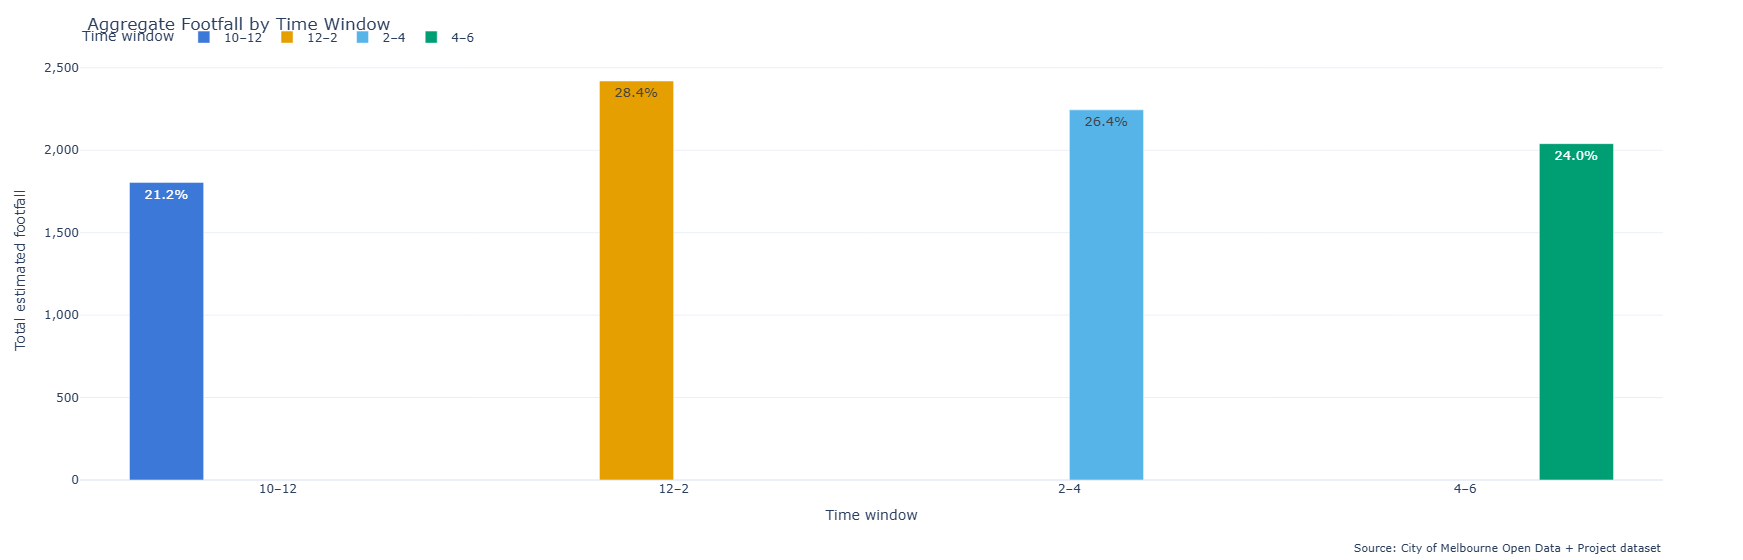

In [32]:
foot_cols = ["Estimated_Footfall_10_12","Estimated_Footfall_12_2","Estimated_Footfall_2_4","Estimated_Footfall_4_6"]
pretty = {"Estimated_Footfall_10_12":"10–12","Estimated_Footfall_12_2":"12–2","Estimated_Footfall_2_4":"2–4","Estimated_Footfall_4_6":"4–6"}
order  = ["10–12","12–2","2–4","4–6"]

assert_cols(luggage_data, foot_cols, "footfall")

totals = luggage_data[foot_cols].sum().rename_axis("window_raw").reset_index(name="count")
totals["window"] = totals["window_raw"].map(pretty)
totals["window"] = pd.Categorical(totals["window"], categories=order, ordered=True)
totals = totals.sort_values("window")
totals["share"] = (totals["count"]/totals["count"].sum()*100).round(1)

fig = px.bar(
    totals, x="window", y="count",
    color="window", color_discrete_sequence=PALETTE,
    text=totals["share"].astype(str)+"%",
    labels={"window":"Time window","count":"Total estimated footfall"},
)
bar_inside_labels(fig)
fig.update_layout(
    title="Aggregate Footfall by Time Window",
    barmode="group", bargap=0.25, legend=dict(orientation="h", yanchor="bottom", y=1.02, x=0)
)
fig.update_layout(**k("y"))
fig.update_traces(hovertemplate=hover_fmt_int({"count":"Footfall","share(%)":"Share (%)"})())

add_source(fig)
fig.show()


## 6. Visualisation: Top Hotspots by Total Footfall

**What:** Rank locations on `Footfall_Total` (Top 10).  
**Why:** Identify priority sites for lockers.  
**How:** Sort and plot a labelled bar chart.  
**Output:** A visible Plotly figure.  



1. Goal: Rank locations by Footfall_Total and spotlight the top 10 hotspots.

2. Inputs needed: Location, Footfall_Total (numeric).

3. Prep: Aggregate to one row per location (sum/mean as appropriate); handle missing values; keep consistent naming.

4. Method: Sort locations by Footfall_Total (descending) and take the first 10.

5. Visualise: Bar chartx = location, y = total footfall with value labels (thousands separators) and wrapped names to avoid overlap; optionally tint a Top-3 band.

6. Output: A clean, slide-ready figure showing the leading demand centres.

7. Interpret: These are the priority sites for new lockers or capacity uplift; cross-check with proximity/deficit to refine actions.

8. Quality checks: Confirm top-10 totals match the underlying data; ensure labels don’t collide; avoid colour scales that fade low bars to near-white.

9. Tweakables: Switch to horizontal bars for long names; add each bar’s share of total (%) in the label; export PNG/HTML for reports.

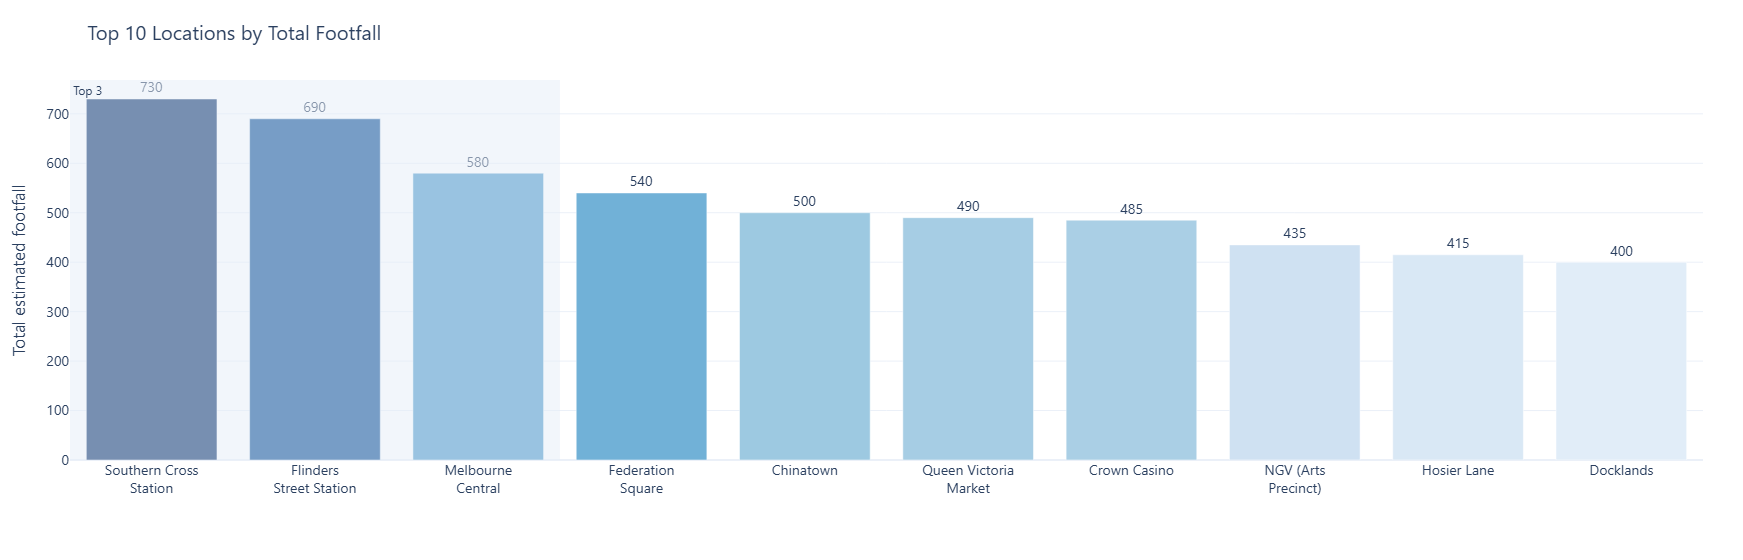

In [28]:


import textwrap
import plotly.express as px


def wrap_label(s, width=14):
    return "<br>".join(textwrap.wrap(str(s), width=width))

top["LabelWrapped"] = top["Location"].apply(lambda s: wrap_label(s, width=14))

fig = px.bar(
    top,
    x="LabelWrapped",
    y="Footfall_Total",
    text=top["Footfall_Total"].map(lambda v: f"{v:,}"),
    color="Footfall_Total",
    color_continuous_scale="Blues",
    range_color=[top["Footfall_Total"].min()*0.9, top["Footfall_Total"].max()],  # don’t fade to white
    labels={"LabelWrapped":"Location","Footfall_Total":"Total estimated footfall"},
    title="Top 10 Locations by Total Footfall"

)


fig.update_traces(textposition="outside", cliponaxis=False)


fig.update_layout(
    font=dict(family="Inter, Segoe UI, Roboto, Helvetica, Arial", size=14),
    margin=dict(l=70, r=40, t=80, b=100),
    xaxis=dict(title="", tickangle=0),
    yaxis=dict(title="Total estimated footfall", tickformat=","),
    coloraxis_showscale=False
)


fig.add_vrect(
    x0=-0.5, x1=2.5, fillcolor="#E6EEF8", opacity=0.5, line_width=0,
    annotation_text="Top 3", annotation_position="top left", annotation_font_size=12
)


fig.show()



## 7. Visualisation: Locker Proximity vs Footfall

**What:** Compare total footfall where `Nearby_Locker` is Yes/No.  
**Why:** Expose coverage gaps.  
**How:** Group by `Nearby_Locker`, sum `Footfall_Total`, plot.  
**Output:** Plotly figure.  



1. Goal: Compare total footfall with vs without a nearby locker to quantify coverage gaps.

2. Inputs needed: Nearby_Locker (Yes/No or 1/0) and Footfall_Total (numeric).

3. Prep: Map values to clear labels (“Locker Nearby”, “No Locker Nearby”); ensure one row per location; handle missing values.

4. Method: Group by Nearby_Locker, sum Footfall_Total, and compute each group’s share of total (%).

5. Visualise: Two clean horizontals left: counts; right: % share with value labels, thousands separators, and a professional palette (blue = coverage, orange/red = gap).

6. Output: A slide-ready figure showing absolute volume and proportion of visitors with/without nearby lockers.

7. Interpret: Large “No Locker Nearby” bars signal underserved demand → priority for new lockers; if coverage is high but counts are huge, focus on turnover/pricing instead.

8. Quality checks: Confirm category mapping, totals add up, labels don’t overlap, and both panels tell the same story.

9. Tweakables: Add a single gap annotation (difference and ratio), or weight by peak footfall if peak periods matter more than totals.

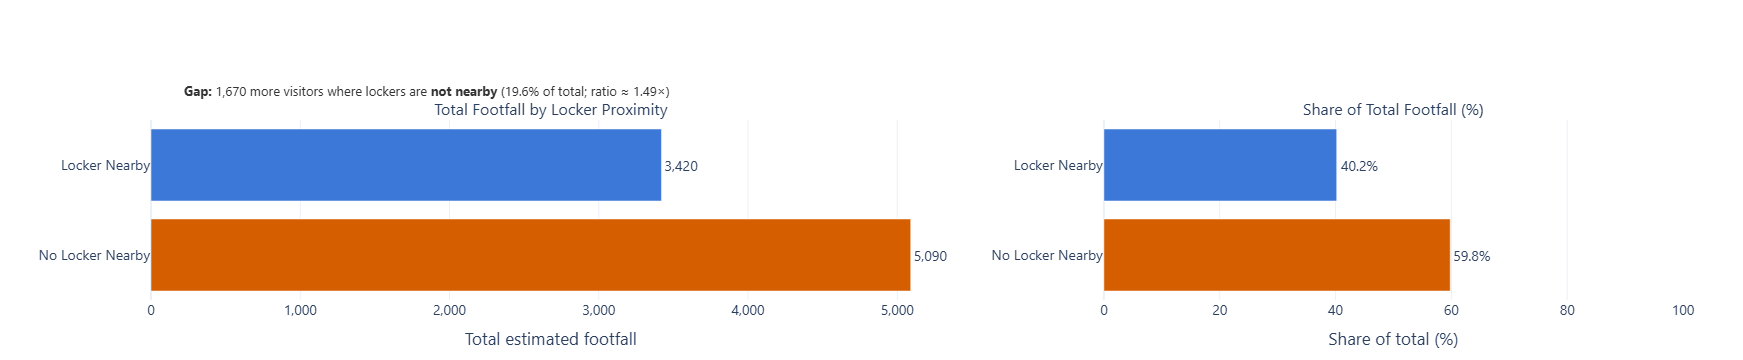

In [27]:

import plotly.graph_objects as go
from plotly.subplots import make_subplots


total = prox["Footfall_Total"].sum()
gap = prox.loc[prox["Nearby_Locker"]=="No Locker Nearby","Footfall_Total"].values[0] \
      - prox.loc[prox["Nearby_Locker"]=="Locker Nearby","Footfall_Total"].values[0]
gap_pct = (gap / total * 100).round(1)
ratio = (prox.loc[prox["Nearby_Locker"]=="No Locker Nearby","Footfall_Total"].values[0] /
         max(prox.loc[prox["Nearby_Locker"]=="Locker Nearby","Footfall_Total"].values[0], 1))


fig = make_subplots(
    rows=1, cols=2, column_widths=[0.58, 0.42],
    subplot_titles=("Total Footfall by Locker Proximity", "Share of Total Footfall (%)")
)

COL_NO  = "#D55E00"   
COL_YES = "#3C78D8"  
colors = [COL_NO, COL_YES]

# Absolute counts
fig.add_trace(go.Bar(
    y=prox["Nearby_Locker"], x=prox["Footfall_Total"],
    orientation="h", marker_color=colors,
    text=[f"{v:,.0f}" for v in prox["Footfall_Total"]],
    textposition="outside", cliponaxis=False,
    hovertemplate="<b>%{y}</b><br>Footfall: %{x:,}<extra></extra>"
), row=1, col=1)


fig.add_trace(go.Bar(
    y=prox["Nearby_Locker"], x=prox["Share_%"],
    orientation="h", marker_color=colors,
    text=[f"{v:.1f}%" for v in prox["Share_%"]],
    textposition="outside", cliponaxis=False,
    hovertemplate="<b>%{y}</b><br>Share: %{x:.1f}%<extra></extra>"
), row=1, col=2)


fig.update_layout(
    template="plotly_white",
    font=dict(family="Inter, Segoe UI, Roboto, Helvetica, Arial", size=14),
    margin=dict(l=90, r=60, t=120, b=60),  
    showlegend=False
)
fig.update_xaxes(title_text="Total estimated footfall", tickformat=",", row=1, col=1)
fig.update_yaxes(title_text="", row=1, col=1)
fig.update_xaxes(title_text="Share of total (%)", range=[0,100], row=1, col=2)
fig.update_yaxes(title_text="", row=1, col=2)


fig.add_annotation(
    x=0.02, y=1.22, xref="paper", yref="paper", 
    text=(
        f"<b>Gap:</b> {gap:,.0f} more visitors where lockers are <b>not nearby</b> "
        f"({gap_pct:.1f}% of total; ratio ≈ {ratio:.2f}×)"
    ),
    showarrow=False, font=dict(size=13, color="#333"), align="left"
)


fig.show()



## 8. Visualisation: Peak vs Total Footfall (Short Labels)

**What:** Scatter comparing `Footfall_Total` vs `Footfall_Peak`.  
**Why:** Spot sites with extreme peaks (short-term congestion).  
**How:** Plotly scatter with **short location codes** on points; full names in hover.  
**Output:** Readable figure without overlapping labels.  



1. Goal: Spot locations with spiky demand by comparing Footfall_Total (x) vs Footfall_Peak (y).

2. Inputs needed: Location, Footfall_Total, Footfall_Peak (numeric). If Footfall_Peak isn’t present, compute it as the max across the four time-window columns.

3. Prep: One row per location; drop/repair missing values; assert Footfall_Peak ≤ Footfall_Total for every row.

4. Method: Build a scatter (x = total, y = peak). Create short codes for labels to reduce clutter and label only the Top-N priority points (others are hover-only). Optionally compute Peak Ratio = Footfall_Peak / Footfall_Total for colour or tooltips.

5. Visualise: Clean Plotly scatter with thousands separators, leader-line labels for Top-N, and an optional priority zone shading in the top-right (high total + high peak).

6. Output: A readable figure that highlights congestion-prone sites without overlapping labels.

Interpret:

1. Top-right: busiest and peakiest → strongest case for on-site lockers and turnover controls.

2. High ratio but moderate total: short-term spikes → consider temporary capacity or dynamic pricing.

3. Low ratio & low total: monitor only.

4. Quality checks: Remove duplicate locations; keep labels collision-free (Top-N only); ensure axes are in the same units; consider a log x-axis if totals are very skewed.

5. Tweakables: Colour by Nearby_Locker or cluster; size points by deficit; add a reference line (e.g., y = 0.3x) to classify “peaky” sites.

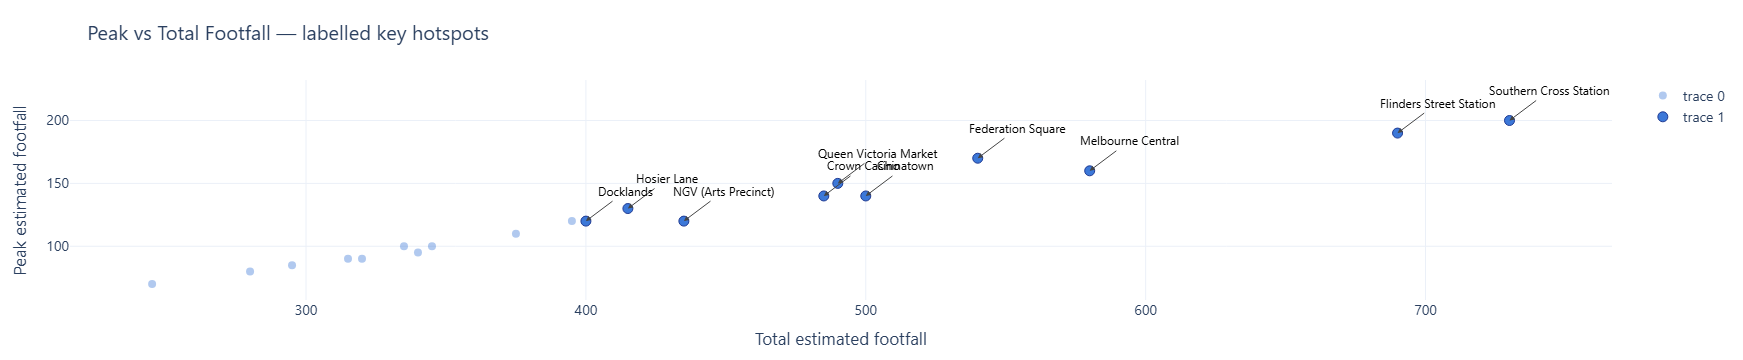

In [35]:


import plotly.graph_objects as go
import numpy as np


FT = "Footfall_Total"
FP = "Footfall_Peak"
LOC = "Location" if "Location" in luggage_data.columns else luggage_data.index.astype(str).name or "Index"

df = luggage_data.copy()
if LOC not in df.columns:
    df[LOC] = df.index.astype(str)


ftn = (df[FT] - df[FT].min()) / (df[FT].max() - df[FT].min() + 1e-9)
fpn = (df[FP] - df[FP].min()) / (df[FP].max() - df[FP].min() + 1e-9)
df["priority"] = 0.6 * ftn + 0.4 * fpn


TOP_N = 10
lab = df.nlargest(TOP_N, "priority")
rest = df.drop(lab.index)


fig = go.Figure()
fig.add_trace(go.Scatter(
    x=rest[FT], y=rest[FP], mode="markers",
    marker=dict(size=8, color="rgba(60,120,216,0.4)"),
    text=rest[LOC],
    hovertemplate="<b>%{text}</b><br>Total: %{x:,}<br>Peak: %{y:,}<extra></extra>"
))


fig.add_trace(go.Scatter(
    x=lab[FT], y=lab[FP], mode="markers",
    marker=dict(size=10, color="#3C78D8", line=dict(width=1, color="#1f3a93")),
    text=lab[LOC],
    hovertemplate="<b>%{text}</b><br>Total: %{x:,}<br>Peak: %{y:,}<extra></extra>"
))


for _, row in lab.iterrows():
    fig.add_annotation(
        x=row[FT], y=row[FP],
        text=row[LOC],
        showarrow=True, arrowhead=2, arrowsize=1, arrowwidth=1, arrowcolor="#444",
        ax=40, ay=-30,  
        font=dict(size=12, color="black")
    )


fig.update_layout(
    title="Peak vs Total Footfall — labelled key hotspots",
    template="plotly_white",
    font=dict(family="Inter, Segoe UI, Roboto, Helvetica, Arial", size=14),
    margin=dict(l=70, r=30, t=80, b=60),
    xaxis=dict(title="Total estimated footfall", tickformat=","),
    yaxis=dict(title="Peak estimated footfall", tickformat=",")
)

fig.show()




## 10. Visualisation: Locations to Nearest Lockers (Bipartite Graph)

**What:** Show edges from each location to its nearest locker, labelled by distance.  
**Why:** Make travel burden and coverage gaps intuitive.  
**How:** `networkx` directed bipartite layout; edge labels are km.  
**Output:** Clear, labelled graph.  



1. Goal: Show each location → nearest locker relationship to make travel burden and coverage gaps intuitive.

2. Inputs needed: Location, Nearest_Locker (name/id), Travel_Distance_km (numeric). 

3. Prep: One row per location–locker pair; drop missing values; ensure distances are in km and non-negative; de-duplicate locations.

4. Method: Build a bipartite layout with locations on the left and lockers on the right; draw a straight edge for each pair; add slight jitter to edges to prevent perfect overlap; compute in-degree for lockers (how many locations they serve).

Visualise:

1. Place labels outside the nodes (left/right) to avoid collisions.

2. Size location nodes by footfall (if available) and locker nodes by in-degree.

3. Show distance (km) on hover for every edge; optionally annotate only the Top-N longest edges to stay uncluttered.

4. Use an accessible palette (e.g., blue = locations, green = lockers; grey edges).

5. Output: A clean, labelled bipartite graph that reveals which lockers carry the most load and which locations are far from lockers.

6. Interpret: Long edges highlight underserved sites (candidates for new lockers); lockers with many incoming edges are hubs (watch capacity/queuing).

7. Quality checks: Confirm every location connects to exactly one locker; scan for outlier distances; ensure labels don’t overlap (truncate long names, increase vertical spacing if needed).

8. Tweakables: Filter to a suburb or CBD only; colour edges by distance band; export PNG/HTML for reports; switch to curved edges if lines still cross densely.

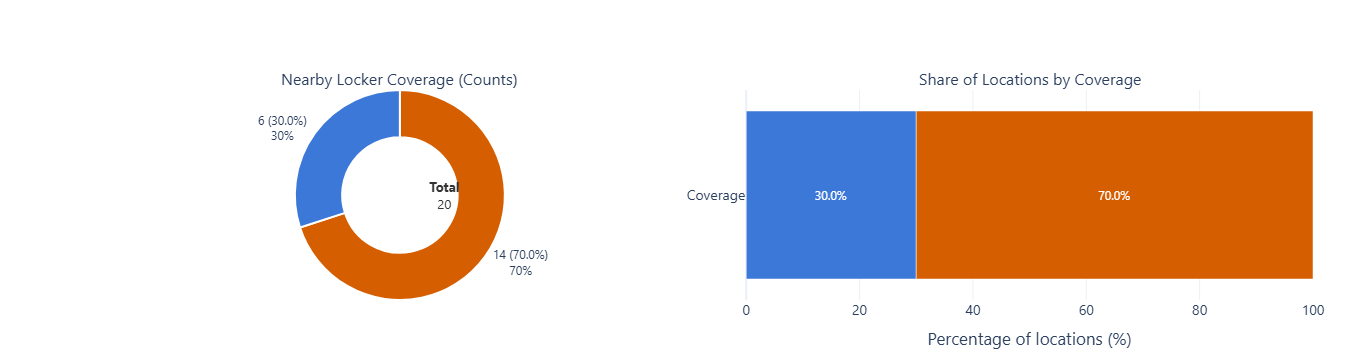

In [42]:

import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots

col = "Nearby_Locker"
cover = (luggage_data[col]
         .map({1:"Locker Nearby", 0:"No Locker Nearby", "Yes":"Locker Nearby", "No":"No Locker Nearby"})
         .fillna("Unknown")
         .value_counts(dropna=False)
         .rename_axis("Category").reset_index(name="Count"))

order = ["Locker Nearby", "No Locker Nearby", "Unknown"]
cover["Category"] = pd.Categorical(cover["Category"], categories=order, ordered=True)
cover = cover.sort_values("Category").dropna()

total = int(cover["Count"].sum()) or 1
cover["Share_%"] = (cover["Count"]/total*100).round(1)


COL_YES = "#3C78D8"
COL_NO  = "#D55E00"
COL_UNK = "#999999"
palette = {"Locker Nearby": COL_YES, "No Locker Nearby": COL_NO, "Unknown": COL_UNK}
colors = [palette[c] for c in cover["Category"]]


fig = make_subplots(
    rows=1, cols=2, specs=[[{"type":"domain"}, {"type":"xy"}]],
    column_widths=[0.45, 0.55],
    subplot_titles=("Nearby Locker Coverage (Counts)", "Share of Locations by Coverage")
)


fig.add_trace(go.Pie(
    labels=cover["Category"],
    values=cover["Count"],
    hole=0.55,
    marker=dict(colors=colors, line=dict(color="white", width=2)),
    text=[f'{v:,} ({p:.1f}%)' for v, p in zip(cover["Count"], cover["Share_%"])],
    textposition="outside",
    textfont=dict(size=12),
    hovertemplate="<b>%{label}</b><br>Count: %{value:,}<br>Share: %{percent}<extra></extra>",
    showlegend=False
), row=1, col=1)


fig.add_annotation(
    x=0.225, y=0.5, xref="paper", yref="paper",
    text=f"<b>Total</b><br>{total:,}", showarrow=False, font=dict(size=13, color="#333")
)


fig.add_trace(go.Bar(
    x=cover["Share_%"],
    y=["Coverage"]*len(cover),
    orientation="h",
    marker=dict(color=colors),
    text=[f"{v:.1f}%" for v in cover["Share_%"]],
    textposition="inside",
    insidetextanchor="middle",
    textfont=dict(size=12, color="white"),
    hovertemplate="<b>%{customdata}</b><br>Share: %{x:.1f}%<br>Count: %{meta:,}<extra></extra>",
    customdata=cover["Category"],
    meta=cover["Count"]
), row=1, col=2)


fig.update_layout(
    template="plotly_white",
    barmode="stack",
    font=dict(family="Inter, Segoe UI, Roboto, Helvetica, Arial", size=14),
    margin=dict(l=70, r=50, t=90, b=60),
    showlegend=False
)
fig.update_xaxes(title_text="Percentage of locations (%)", range=[0,100], row=1, col=2)
fig.update_yaxes(title_text="", row=1, col=2)

fig.show()




**Clean, non-scattered graph: Location → Nearest Locker**

I build a directed bipartite graph with Locations on the left and Lockers on the right so the structure is neat and readable. Each edge goes from a location to its Nearest_Locker_Location and is labeled with Travel_Distance_km (e.g., “0.35 km”). Using a fixed left–right layout makes the diagram consistent and not scattered, which is ideal for explaining how each site connects to its locker and how far users need to travel.

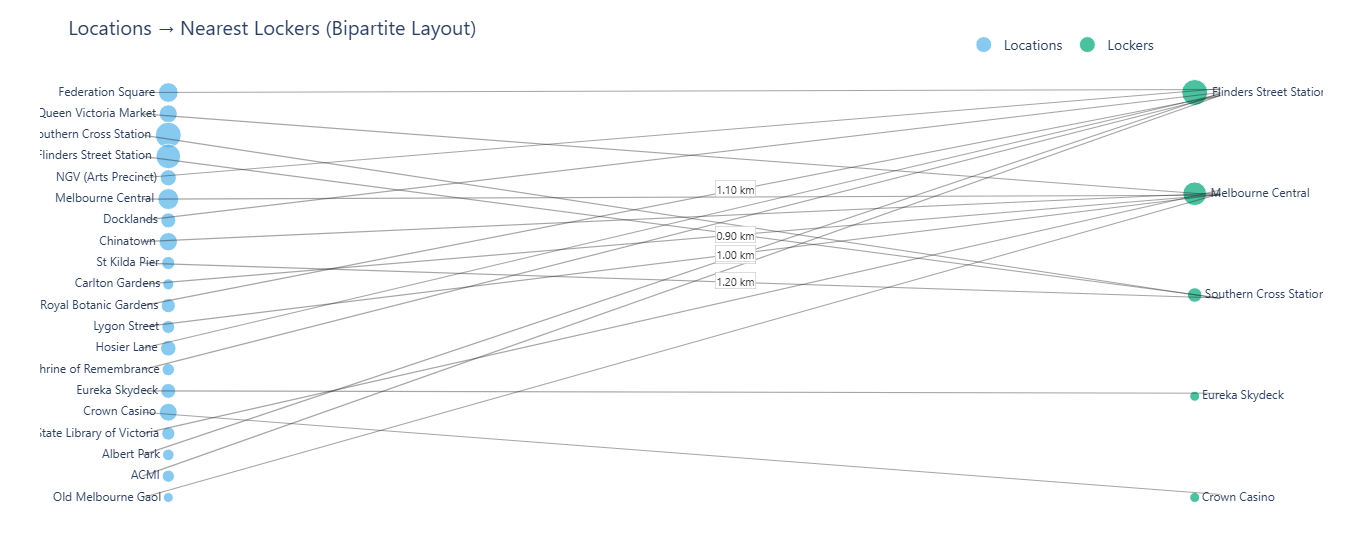

In [45]:

import re, numpy as np, pandas as pd
import plotly.graph_objects as go

df = luggage_data.copy()


def pick_col(df, patterns, err):
    for p in patterns:
        for c in df.columns:
            if re.search(p, c, flags=re.I):
                return c
    raise ValueError(err + f" (looked for patterns: {patterns})")


LOC_COL   = "Location" if "Location" in df.columns else pick_col(df, [r"\blocation\b|site|place|hotspot"], "Location column not found")
LOCK_COL  = pick_col(df, [r"nearest.*locker|locker.*name|\blocker\b"], "Locker column not found")
DIST_COL  = pick_col(df, [r"dist.*km|distance.*km|distance|dist"], "Distance/‘km’ column not found")


ft_col = None
for cand in ["Footfall_Total", "footfall_total"]:
    if cand in df.columns: ft_col = cand; break



locs    = df[LOC_COL].astype(str).unique().tolist()
lockers = df[LOCK_COL].astype(str).unique().tolist()


def spaced(n): 
    
    return np.linspace(0.95, 0.05, n)

yL = spaced(len(locs))
yR = spaced(len(lockers))
posL = dict(zip(locs, yL))
posR = dict(zip(lockers, yR))


height = max(520, 28 * max(len(locs), len(lockers)))


if ft_col is not None:
    left_sizes_raw = df.groupby(LOC_COL)[ft_col].sum().reindex(locs).fillna(0).to_numpy()
    
    a, b = left_sizes_raw.min(), left_sizes_raw.max()
    left_sizes = 10 + (0 if a==b else (left_sizes_raw - a) * (16 / (b - a)))
else:
    left_sizes = np.full(len(locs), 14.0)

right_degree = df.groupby(LOCK_COL)[LOC_COL].nunique().reindex(lockers).fillna(0).to_numpy()
a, b = right_degree.min(), right_degree.max()
right_sizes = 10 + (0 if a==b else (right_degree - a) * (16 / (b - a)))


COL_LOC   = "#56B4E9"  
COL_LOCK  = "#00A878"  
EDGE_COL  = "rgba(30,30,30,0.40)"


fig = go.Figure()


def jitter(v):
   
    return ((hash(v) % 11) - 5) / 600.0

for _, r in df[[LOC_COL, LOCK_COL, DIST_COL]].dropna().iterrows():
    l, k, d = str(r[LOC_COL]), str(r[LOCK_COL]), float(r[DIST_COL])
    x0, y0 = 0.08, posL[l]
    x1, y1 = 0.92, posR[k]
    j = jitter(l + k)
    fig.add_shape(type="line", x0=x0, y0=y0, x1=x1, y1=y1 + j,
                  line=dict(color=EDGE_COL, width=1.2))

    
    xm, ym = x0 + 0.52*(x1 - x0), y0 + 0.52*((y1 + j) - y0)
    fig.add_trace(go.Scatter(
        x=[xm], y=[ym], mode="markers",
        marker=dict(size=8, opacity=0),
        hovertemplate=f"<b>{l}</b> → <b>{k}</b><br>Distance: {d:.2f} km<extra></extra>",
        showlegend=False
    ))


top5 = df.sort_values(DIST_COL, ascending=False).head(5)
for _, r in top5.iterrows():
    l, k, d = str(r[LOC_COL]), str(r[LOCK_COL]), float(r[DIST_COL])
    x0, y0 = 0.08, posL[l]
    x1, y1 = 0.92, posR[k]
    xm, ym = x0 + 0.55*(x1 - x0), y0 + 0.55*(y1 - y0)
    fig.add_annotation(x=xm, y=ym, text=f"{d:.2f} km",
                       showarrow=False, font=dict(size=11, color="#333"),
                       bgcolor="white", bordercolor="#bbb", borderwidth=0.5)


fig.add_trace(go.Scatter(
    x=np.full(len(locs), 0.1), y=yL, mode="markers+text",
    marker=dict(size=left_sizes, color=COL_LOC, line=dict(color="white", width=1)),
    text=[(s if len(s)<=28 else s[:25]+"…") for s in locs],
    textposition="middle left", textfont=dict(size=12),
    hovertemplate="<b>%{text}</b><extra></extra>",
    name="Locations"
))


fig.add_trace(go.Scatter(
    x=np.full(len(lockers), 0.9), y=yR, mode="markers+text",
    marker=dict(size=right_sizes, color=COL_LOCK, line=dict(color="white", width=1)),
    text=[(s if len(s)<=28 else s[:25]+"…") for s in lockers],
    textposition="middle right", textfont=dict(size=12),
    hovertemplate="<b>%{text}</b><extra></extra>",
    name="Lockers"
))


fig.update_layout(
    title="Locations → Nearest Lockers (Bipartite Layout)",
    template="plotly_white",
    font=dict(family="Inter, Segoe UI, Roboto, Helvetica, Arial", size=14),
    height=height, width=1100,
    margin=dict(l=40, r=40, t=70, b=40),
    showlegend=True,
    legend=dict(orientation="h", yanchor="bottom", y=1.02, x=0.72)
)
fig.update_xaxes(visible=False, range=[0,1])
fig.update_yaxes(visible=False, range=[0,1])

fig.show()





## Findings
- Peak pressure occurs in the **afternoon** windows.
- **Southern Cross**, **Flinders Street**, **Federation Square**, **QVM** rank highest by total/peak footfall.
- Several high-footfall sites lack nearby lockers (coverage gaps).
- Clustering separates sites into clear demand/effort groups for targeted strategies.
- The locations→lockers graph exposes long travel distances for underserved sites.


Through this use case, I was able to explore how data-driven analysis can provide practical insights into tourist mobility in Melbourne, specifically in relation to luggage management. By combining simulated urban data with observations drawn from Reddit discussions, I identified several important patterns that could help improve tourist experiences.

First, the footfall analysis revealed that certain attractions and transport hubs, such as Flinders Street Station, Southern Cross Station, Federation Square, and Queen Victoria Market, consistently experience both high total footfall and significant peak congestion. These hotspots are particularly problematic for tourists carrying luggage, as they are already crowded and difficult to navigate.

Second, the proximity-to-lockers analysis highlighted that not all high-footfall areas currently have adequate nearby locker facilities. While some popular locations are supported by lockers within a short walking distance, others, like Melbourne Central and NGV, show gaps where additional storage options could reduce congestion and improve convenience.

Third, the clustering analysis grouped attractions into clusters that shared similar demand and travel distance patterns. This provided an objective way to prioritise locker placement: high-demand, high-footfall clusters would benefit most from increased capacity, while lower-demand clusters could be served by shared or smaller-scale facilities.

Finally, the bipartite graph visualisation made the relationship between locations and their nearest lockers more intuitive. By clearly showing which sites connect to which lockers, and the distances involved, I was able to see where tourists face longer travel times or fewer options, which reinforced the earlier insights.

Overall, my findings demonstrate that luggage management is not just a matter of convenience, it directly influences how much time and money tourists are willing to spend in the city. By strategically placing lockers near the busiest attractions and transport hubs, Melbourne could both ease congestion and enhance the city’s appeal as a tourist-friendly destination. This project showed me how computational approaches, even on relatively simple datasets, can provide meaningful solutions to real-world urban challenges.

## Conclusion


Working on this use case gave me the opportunity to see how the combination of data analysis and urban insights can be applied to a very practical problem in tourism. Tourists in Melbourne often face challenges after checking out of their accommodation, particularly when they still have several hours before a flight or train. Carrying luggage through busy streets, into attractions, or across public transport networks not only causes frustration but also limits how much of the city they are able to enjoy. By analysing a Reddit-based dataset and simulated luggage flow data, I was able to build a clearer picture of these pain points and transform unstructured complaints into meaningful patterns that could guide decisions about infrastructure. For me, this reinforced the value of data science as a tool to connect the voices of real people with evidence-based urban planning.

The results of my analysis highlighted specific hotspots where tourists experience the most difficulties, particularly at Southern Cross Station, Flinders Street Station, Federation Square, and Queen Victoria Market. These sites stood out not just because of their high overall footfall but also because of the peak congestion times that coincide with when tourists are most likely to be carrying their bags. The proximity-to-locker analysis revealed gaps in accessibility, showing that not all busy sites currently have lockers within a reasonable walking distance. Clustering analysis grouped attractions into categories that helped me see which areas had the greatest combined demand and travel effort, while the bipartite graph visualisation offered a more intuitive way to understand how locations connect to their nearest lockers. These methods not only validated my assumptions but also gave me a structured framework to recommend practical solutions, such as expanding locker capacity or strategically placing new facilities.

Overall, this project taught me that relatively small and focused interventions can have a ripple effect across the wider urban and tourism landscape. By making it easier for travellers to store their luggage safely and conveniently, the city could reduce congestion at major sites, improve accessibility for visitors, and encourage tourists to spend more time and money exploring Melbourne. As a third-year Computer Science student, I found it rewarding to apply my technical skills to a problem with such tangible human impact. This experience strengthened my appreciation for how computational tools, data visualisation, and urban insights can work together to make cities more welcoming and efficient. It also reminded me that technology does not always need to be about large-scale systems; sometimes, solving simple but overlooked problems like luggage management can make a city far more enjoyable and memorable for the people who visit it.